In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load the dataset.
df=pd.read_csv(r'/Users/hibaali/Desktop/Coding.html/python/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
#descriptive analysis
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [6]:
#Checking for missing values
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

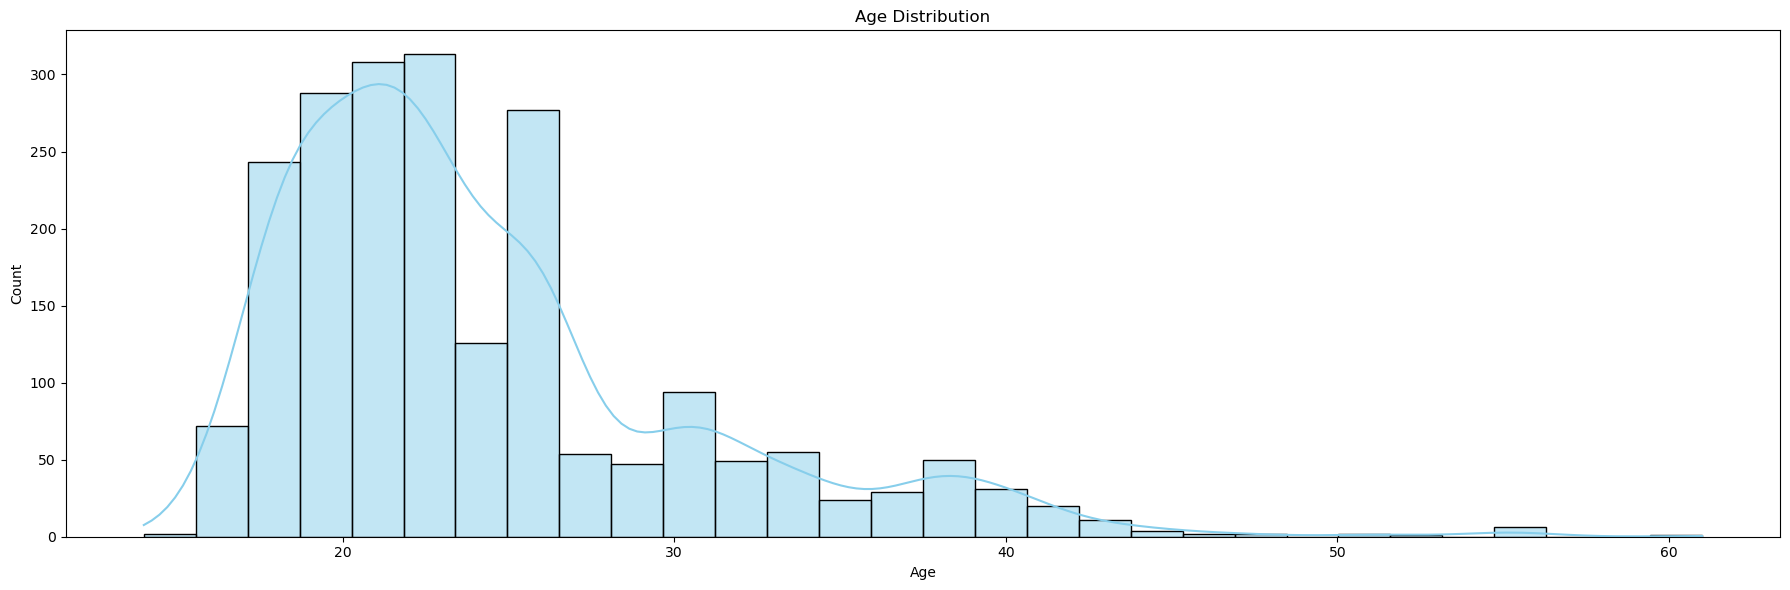

In [8]:
#Distribution plots for respective columns of age, height and weight.
plt.figure(figsize=(18,6))

sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.tight_layout()#used to automatically adjust subplot parameters to give specified padding.
plt.show()

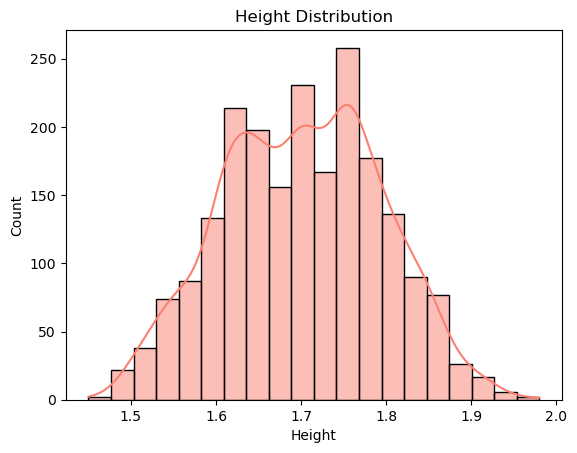

<Figure size 640x480 with 0 Axes>

In [9]:

sns.histplot(df['Height'], kde=True, bins=20, color='salmon')
plt.title('Height Distribution')
plt.show()
plt.tight_layout()

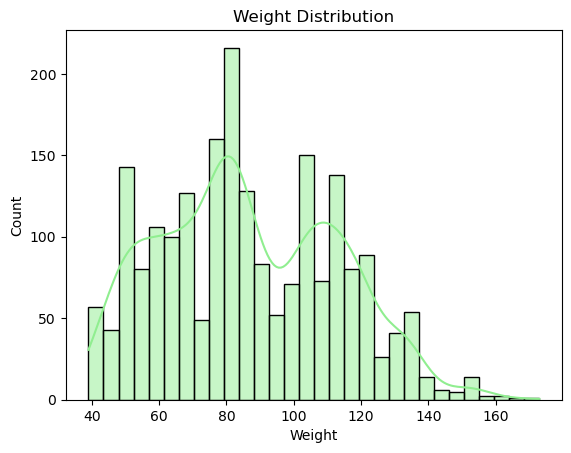

<Figure size 640x480 with 0 Axes>

In [10]:

sns.histplot(df['Weight'], kde=True, bins=30, color='lightgreen')
plt.title('Weight Distribution')
plt.show()

plt.tight_layout()

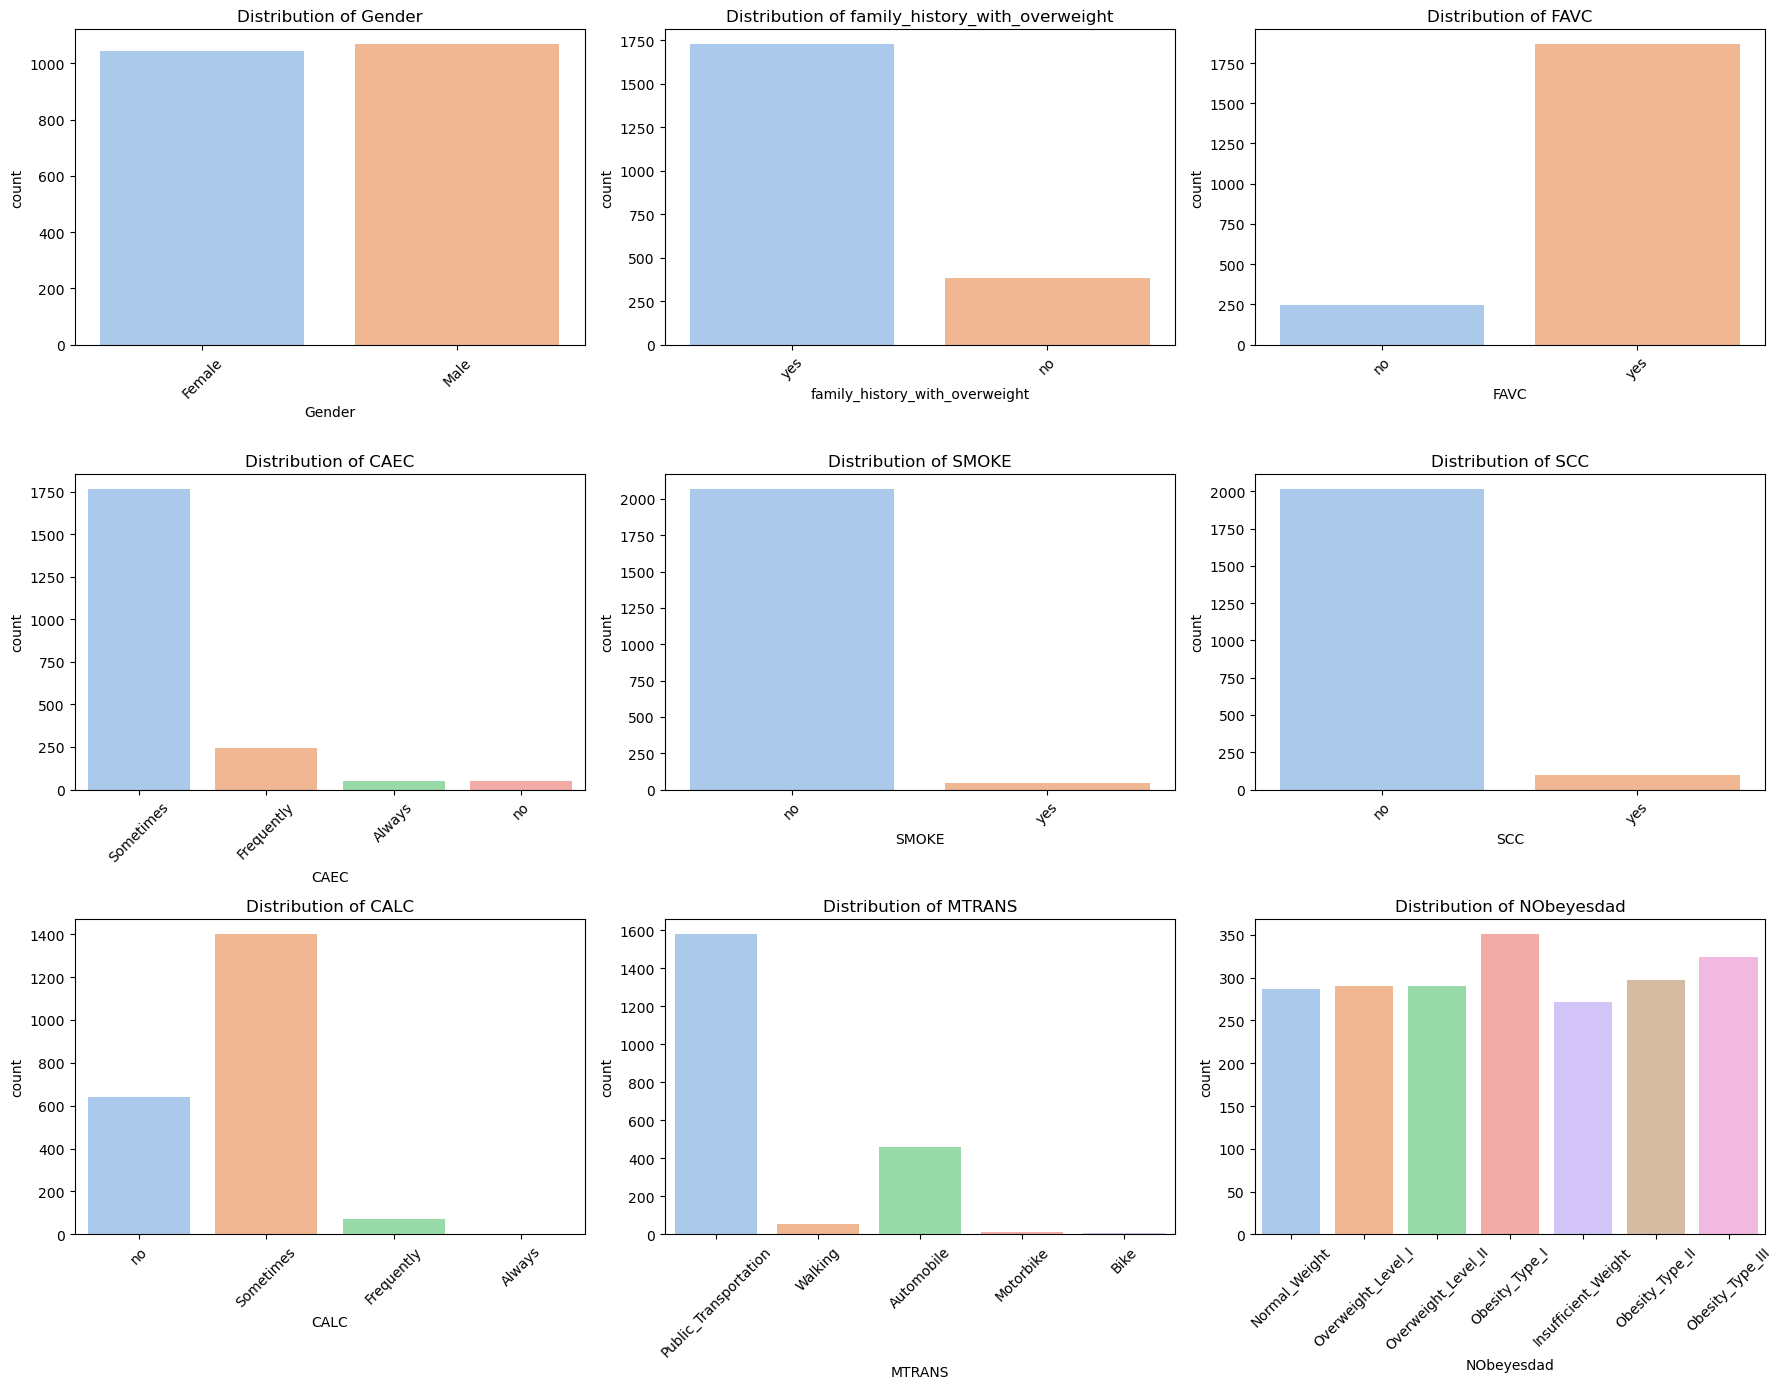

In [12]:
#Plotting bar plots of the rest categorical features.
categorical_features=['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad']

plt.figure(figsize=(18,14))

for i, feature in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=df,x=feature,palette='pastel')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
# Encoding categorical variables for analysis

# Use one-hot encoding for distinct categorical features and ordinal encoding for ordinal features.

df_encode=df.copy() #data frame has been copied regarding ordinal features.

# Mapping ordinal categories to numeric values
ord_mappings = {
    'family_history_with_overweight': {'yes': 1, 'no': 0},
    'FAVC': {'yes': 1, 'no': 0},
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'SMOKE': {'yes': 1, 'no': 0},
    'SCC': {'yes': 1, 'no': 0},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
}

# Apply ordinal encoding
for column, mapping in ord_mappings.items():
    df_encode[column] = df[column].map(mapping)

In [15]:
# One-hot encoding for distinct categorical features
df_encode = pd.get_dummies(df_encode, columns=['Gender', 'MTRANS'], drop_first=True)

In [16]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [17]:
# Uniquely encoding the target variable NObeyesdad

target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6,
}
df_encode['NObeyesdad'] = df['NObeyesdad'].map(target_mapping)

/Users/hibaali/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


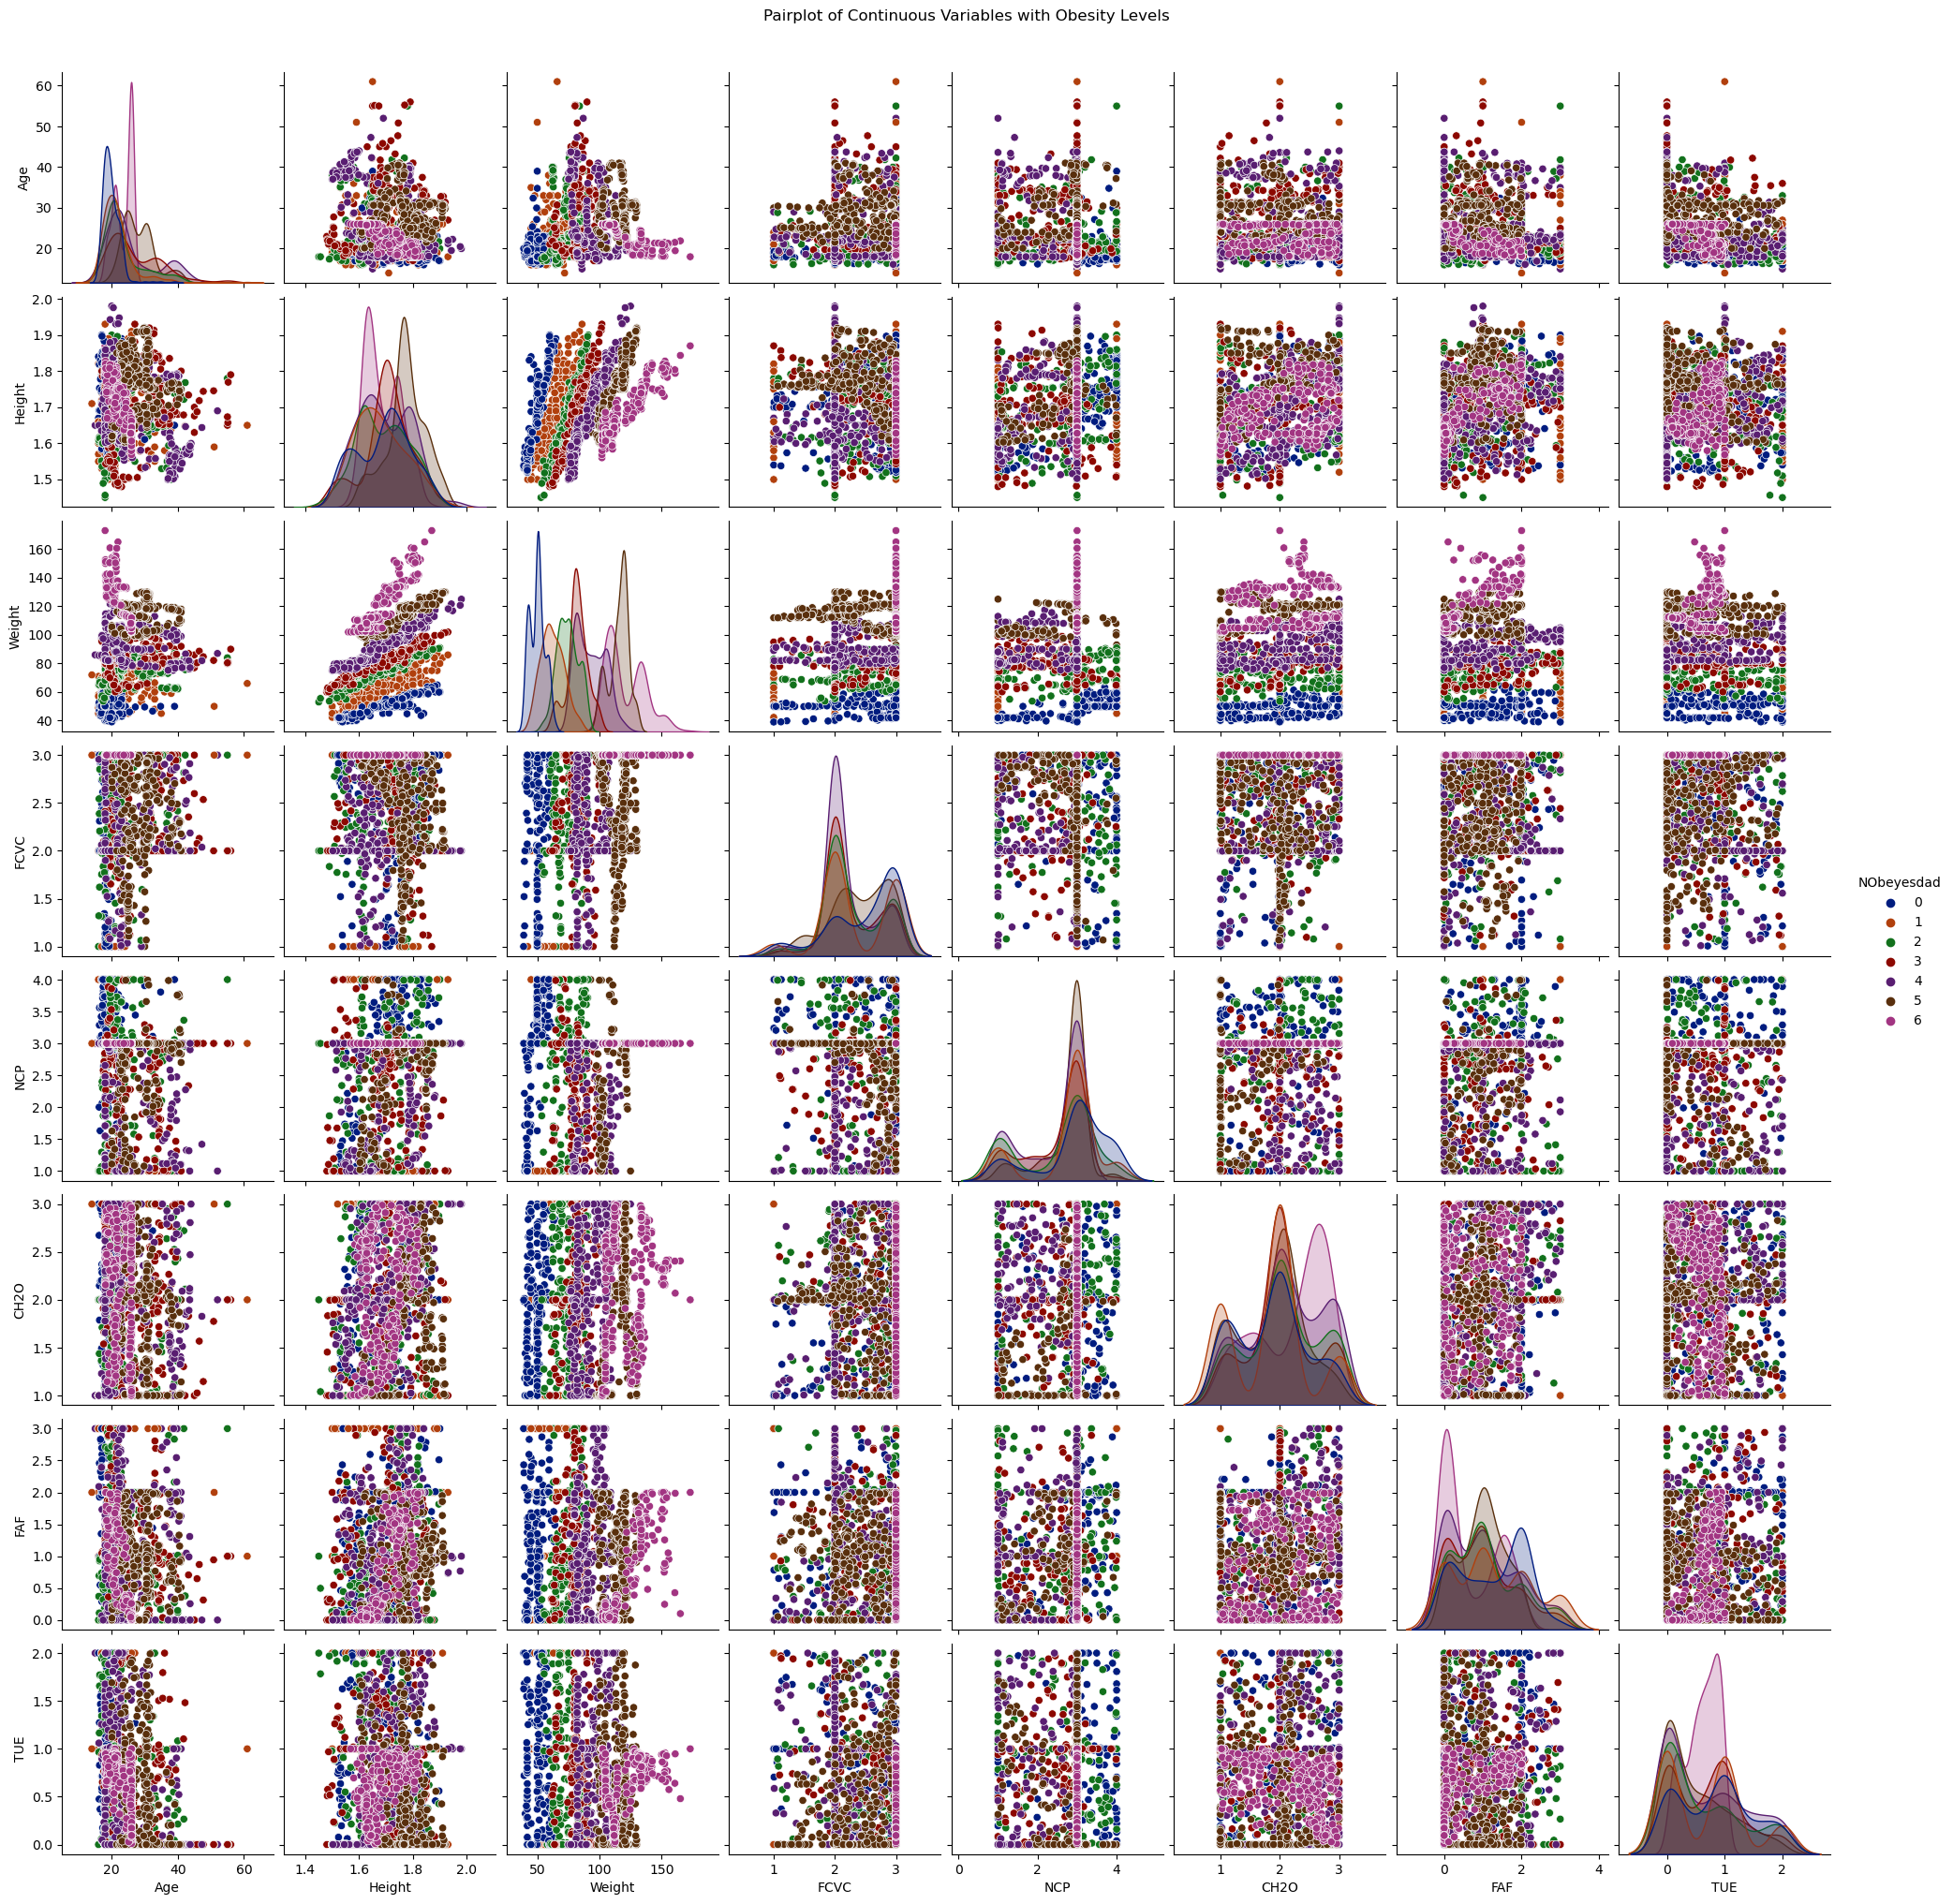

In [18]:
# Pairplot for continuous ordinal variables and target classes
sns.pairplot(df_encode,vars=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'],hue='NObeyesdad',palette='dark',diag_kind='kde',)
plt.suptitle('Pairplot of Continuous Variables with Obesity Levels', y=1.02)
plt.show()

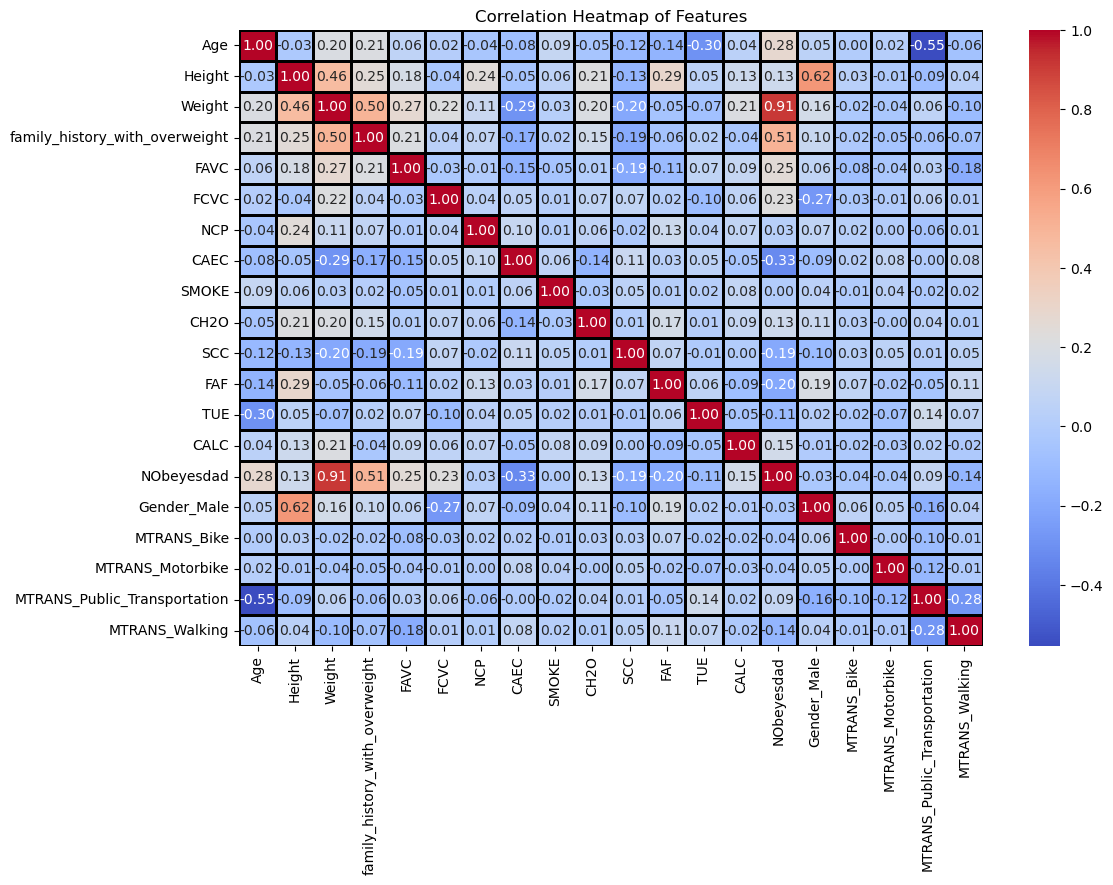

In [20]:
#Printing the Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df_encode.corr()  #calculates the correlation between columns in a DataFrame
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap of Features')
plt.show()

In [35]:
#Applying supervised machine learning algorithm-Support Vector Machine on the given daatset.
#It is to be noted that the 2 distinguashable classes for which this model works is all the given
#Categorical features in the dataset VS the last final column i.e NObeyesdad.

#Importing all the necessary libraries.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

In [31]:
#Load the dataset.
data=pd.read_csv(r'/Users/hibaali/Desktop/Coding.html/python/ObesityDataSet_raw_and_data_sinthetic.csv')

In [32]:
# Encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}
for column in categorical_columns:
    lab_enc_cat_col = LabelEncoder()
    data[column] = lab_enc_cat_col.fit_transform(data[column])
    label_encoders[column] = lab_enc_cat_col

# Prepare features (x) and target (y)
# Features and target variable
X = data.drop('NObeyesdad', axis=1)  
y = data['NObeyesdad']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Scale the features
#Reason:Many machine learning algorithms use distance-based calculations to make predictions. 
#If the features are not scaled, those with larger values can have a disproportionate impact on the results.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [40]:
#Model has been succesfully fitted!

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)
y_pred

array([0, 4, 1, 0, 6, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 1, 4, 3, 3, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 5, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 5, 3, 1, 1, 1, 5, 0, 5, 3, 3, 1, 3, 1, 4, 6, 0, 3, 6,
       1, 4, 0, 1, 6, 6, 0, 0, 5, 3, 3, 2, 4, 3, 1, 2, 3, 3, 2, 2, 5, 6,
       1, 6, 1, 3, 0, 1, 2, 0, 1, 2, 5, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 5, 4, 3, 2, 5, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 5, 4, 0, 4, 1, 2, 6, 6, 0, 0, 1, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 1, 1, 2, 0, 3, 0, 3, 1, 5, 6, 1, 1, 3, 4, 2, 6,
       2, 6, 2, 1, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 1, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 1, 2, 0, 2, 3, 0, 5, 3, 3, 2,
       4, 6, 3, 5, 3, 6, 0, 4, 1, 1, 5, 4, 1, 5, 5, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 5, 2, 1, 2, 2, 0, 5, 2, 0, 6, 1, 5, 2, 3, 2, 2, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 3, 4, 6, 2, 3, 2, 3, 4, 3, 0, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 1, 2, 0, 6, 3, 3, 6, 6, 1,

In [41]:
# Proceeding with the final evaluation the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred)


In [42]:
#Printing the final results:rint("SVM Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification)

Accuracy: 88.89%
Confusion Matrix:
[[52  4  0  0  0  0  0]
 [ 3 52  1  0  0  4  2]
 [ 0  0 70  4  0  2  2]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 1 12  0  0  0 41  2]
 [ 0  2  2  0  0  5 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.74      0.84      0.79        62
           2       0.95      0.90      0.92        78
           3       0.93      0.98      0.96        58
           4       1.00      1.00      1.00        63
           5       0.79      0.73      0.76        56
           6       0.87      0.82      0.85        50

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423

